In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
df.info()
df.shape
df.describe()
df.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


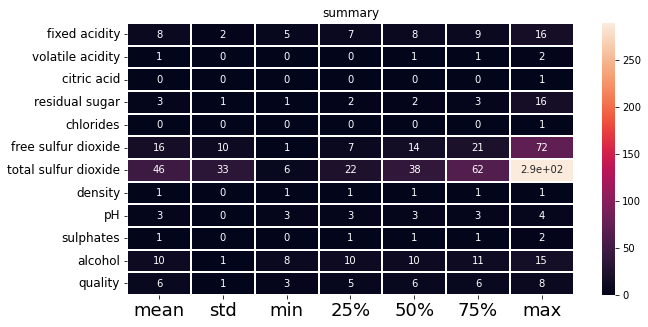

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose()),linewidth=2,annot=True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title('summary')
plt.savefig('heatmap.png')
plt.show()

In [15]:
def unistats(df):
    output_df = pd.DataFrame(columns=['Count','Missing','NUnique','Unique','Dtype', 'Numeric',
                                      'Mode','Mean','Min','25%','Median','75%','Max','Std', 'Skew', 'Kurt'])
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            output_df.loc[col] = [df[col].count(),
                                  df[col].isnull().sum(),
                                  df[col].nunique(),
                                  df[col].unique(),
                                  df[col].dtype,
                                  pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0],
                                  df[col].mean(),
                                  df[col].min(),
                                  df[col].quantile(0.25),
                                  df[col].median(),
                                  df[col].quantile(0.75),
                                  df[col].max(),
                                  df[col].std(),
                                  df[col].skew(),
                                  df[col].kurt()]
        else:
            output_df.loc[col] = [df[col].count(),df[col].isnull().sum(),df[col].nunique(), df[col].unique(), df[col].dtype, pd.api.types.is_numeric_dtype(df[col]),
                                  df[col].mode().values[0],'','','','','','','','','']
    return output_df.sort_values(by=['Numeric','Skew', 'NUnique'], ascending=False)
unistats(df)

,Count,Missing,NUnique,Unique,Dtype,Numeric,Mode,Mean,Min,25%,Median,75%,Max,Std,Skew,Kurt
chlorides,1599,0,153,"[0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.0...",float64,True,0.0800,0.087467,0.01200,0.0700,0.07900,0.090000,0.61100,0.047065,5.680347,41.715787
residual sugar,1599,0,91,"[1.9, 2.6, 2.3, 1.8, 1.6, 1.2, 2.0, 6.1, 3.8, ...",float64,True,2.0000,2.538806,0.90000,1.9000,2.20000,2.600000,15.50000,1.409928,4.540655,28.617595
sulphates,1599,0,96,"[0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.8...",float64,True,0.6000,0.658149,0.33000,0.5500,0.62000,0.730000,2.00000,0.169507,2.428672,11.720251
total sulfur dioxide,1599,0,144,"[34.0, 67.0, 54.0, 60.0, 40.0, 59.0, 21.0, 18....",float64,True,28.0000,46.467792,6.00000,22.0000,38.00000,62.000000,289.00000,32.895324,1.515531,3.809824
free sulfur dioxide,1599,0,60,"[11.0, 25.0, 15.0, 17.0, 13.0, 9.0, 16.0, 52.0...",float64,True,6.0000,15.874922,1.00000,7.0000,14.00000,21.000000,72.00000,10.460157,1.250567,2.023562
fixed acidity,1599,0,96,"[7.4, 7.8, 11.2, 7.9, 7.3, 7.5, 6.7, 5.6, 8.9,...",float64,True,7.2000,8.319637,4.60000,7.1000,7.90000,9.200000,15.90000,1.741096,0.982751,1.132143
alcohol,1599,0,65,"[9.4, 9.8, 10.0, 9.5, 10.5, 9.2, 9.9, 9.1, 9.3...",float64,True,9.5000,10.422983,8.40000,9.5000,10.20000,11.100000,14.90000,1.065668,0.860829,0.200029
volatile acidity,1599,0,143,"[0.7, 0.88, 0.76, 0.28, 0.66, 0.6, 0.65, 0.58,...",float64,True,0.6000,0.527821,0.12000,0.3900,0.52000,0.640000,1.58000,0.179060,0.671593,1.225542
citric acid,1599,0,80,"[0.0, 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29...",float64,True,0.0000,0.270976,0.00000,0.0900,0.26000,0.420000,1.00000,0.194801,0.318337,-0.788998
quality,1599,0,6,"[5, 6, 7, 4, 8, 3]",int64,True,5.0000,5.636023,3.00000,5.0000,6.00000,6.000000,8.00000,0.807569,0.217802,0.296708


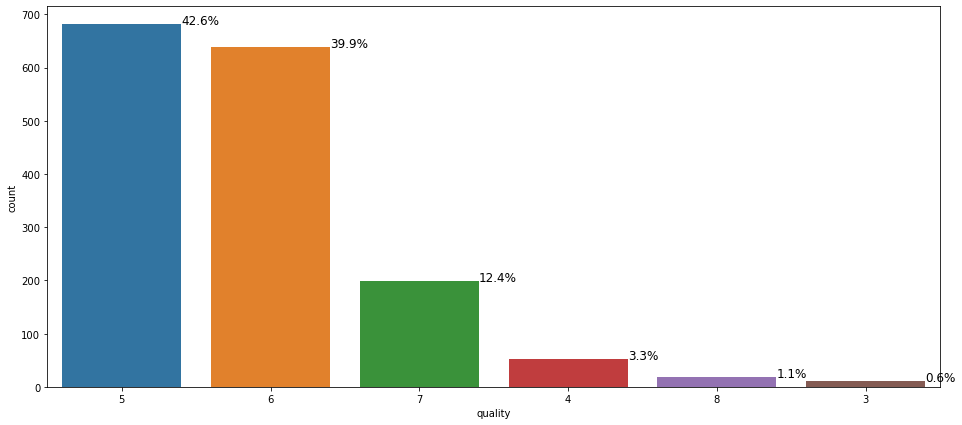

In [16]:
def univaritePlot(df,col,plotnumber):
    if plotnumber==0:
        sns.set(style='darkgrid')
       
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title(col.upper() + 'DISTRIBUTION PLOT')
        sns.distplot(df[col],ax=ax[0])
       
        ax[1].set_title(col.upper() + 'BOX PLOT')
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v',color='red')
        plt.show()
    if plotnumber==1:
        fig, ax = plt.subplots()
        fig.set_size_inches(len(df[col].unique())+10 , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12)
univaritePlot(df=df,col='quality',plotnumber=1)

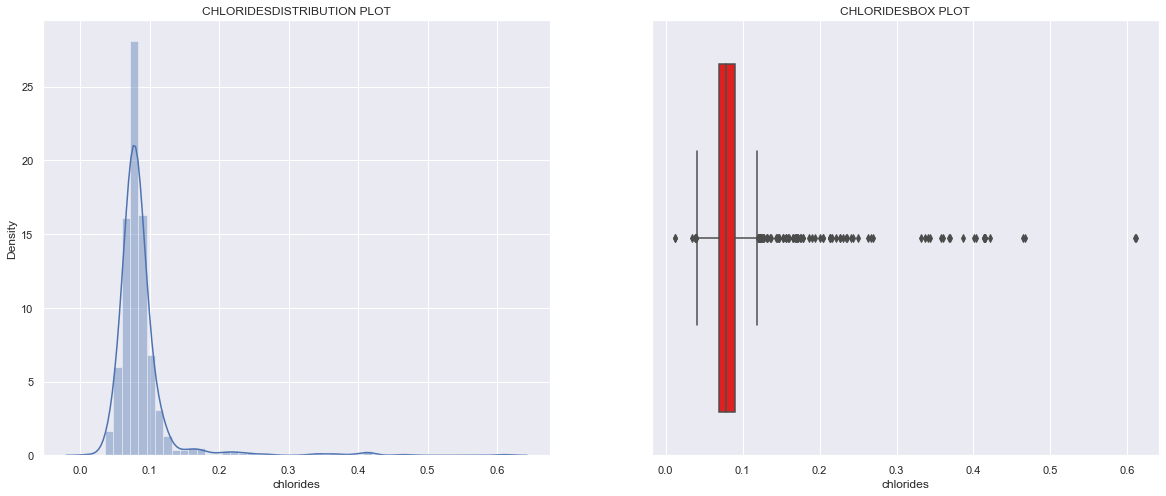

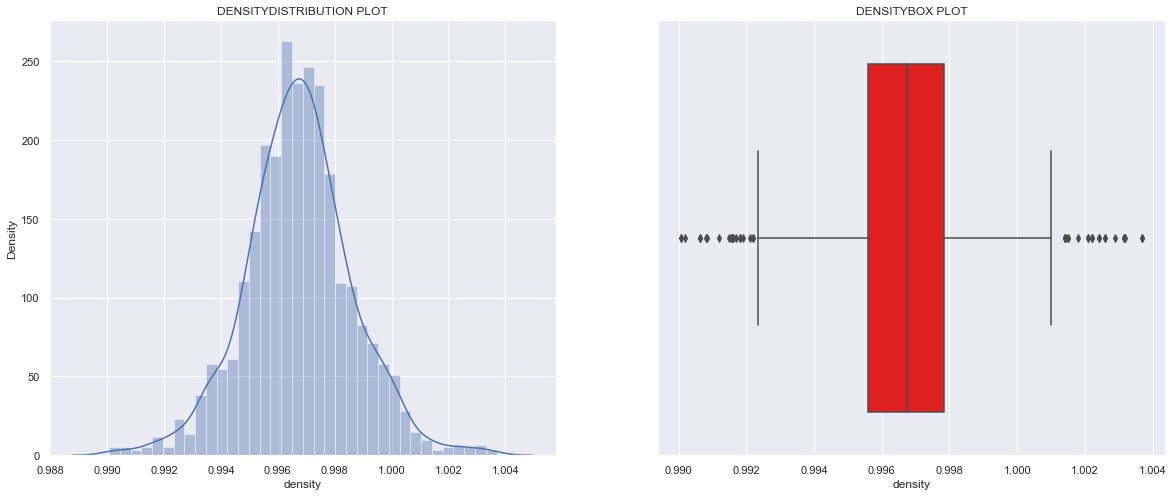

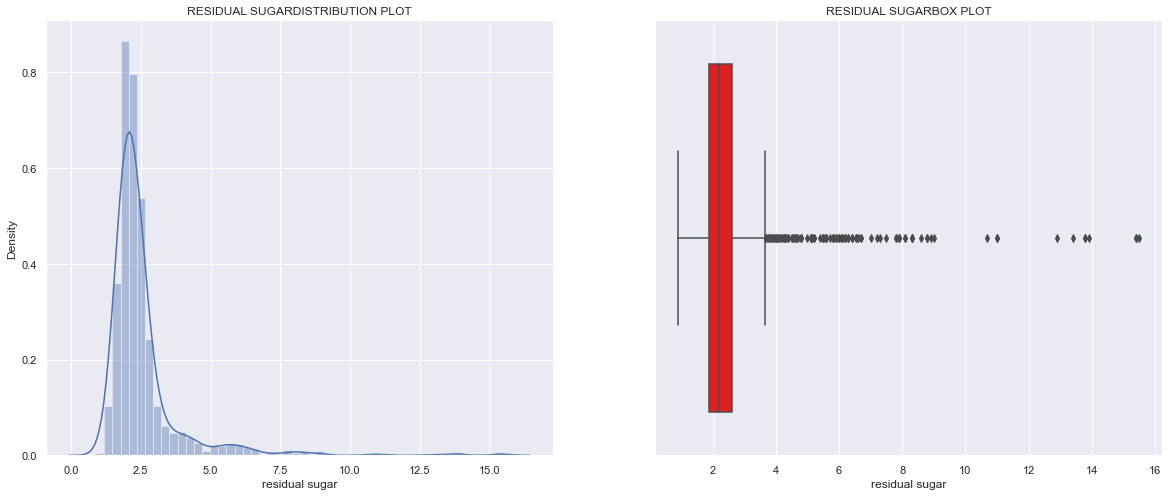

In [17]:
univaritePlot(df=df,col='chlorides',plotnumber=0)
univaritePlot(df=df,col='density',plotnumber=0)
univaritePlot(df=df,col='residual sugar',plotnumber=0)

In [18]:
wine_table = []
for i in df.quality:
    if i <= 5:
        wine_table.append(0)
    else:
        wine_table.append(1)   
df['label'] = wine_table
df[:20]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,0


In [19]:
bins = (2,5.5,8)
labels = ['bad','good']
df['quality'] = pd.cut(df['quality'],bins=bins,labels=labels)

In [9]:
df.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,bad,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,bad,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,bad,0


In [20]:
X=df.drop(['label','quality'], axis=1)
y=df['label']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn import metrics
rfc=RandomForestClassifier(n_estimators=100)

In [22]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
y_pred=rfc.predict(X_test)

print("Classification Report:\n",classification_report(y_test, y_pred))
print("Confusion Metrics :\n",confusion_matrix(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred, average='micro'))
print('Precision Score:', metrics.precision_score(y_test, y_pred, average="micro"))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       213
           1       0.83      0.83      0.83       267

    accuracy                           0.81       480
   macro avg       0.81      0.81      0.81       480
weighted avg       0.81      0.81      0.81       480

Confusion Metrics :
 [[167  46]
 [ 45 222]]
F1 Score:  0.8104166666666667
Precision Score: 0.8104166666666667
Accuracy:  0.8104166666666667


In [24]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results = model.fit()

pd.DataFrame({'coef': results.params, 'p values': round(results.pvalues, 3)})

,coef,p values
const,5.665281,0.726
fixed acidity,0.021775,0.265
volatile acidity,-0.568371,0.000
citric acid,-0.181901,0.108
residual sugar,-0.000564,0.961
chlorides,-0.548839,0.087
free sulfur dioxide,0.005100,0.003
total sulfur dioxide,-0.003309,0.000
density,-6.909218,0.675
pH,0.020161,0.890


In [26]:
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]  

pd.DataFrame({'coef_name': X_incl_const.columns,
             'vif':np.around(vif, 2)})

,coef_name,vif
0,const,1675559.25
1,fixed acidity,7.19
2,volatile acidity,1.82
3,citric acid,3.14
4,residual sugar,1.74
5,chlorides,1.46
6,free sulfur dioxide,1.97
7,total sulfur dioxide,2.20
8,density,5.90
9,pH,3.22


In [27]:
pip install -U imbalanced-learn

In [28]:
from imblearn.over_sampling import SMOTE

In [31]:
oversample = SMOTE ()
x_train, y_train = oversample.fit_resample (X, y)

In [32]:
print("X_train Shape", X_train.shape)
print("y_train Shape", y_train.shape)

imb = (y_train != 0).sum()/(y_train == 0).sum()
print("Imbalance in Train Data : ",imb)

X_train Shape (1119, 11)
y_train Shape (1710,)
Imbalance in Train Data :  1.0


In [33]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support

In [34]:
svc= SVC()

In [35]:
svc.fit(x_train,y_train)

SVC()

In [36]:
preds1= svc.predict(X_test)

In [37]:
print("Accuracy Score:",accuracy_score(preds1,y_test))
print("classification Report:\n",classification_report(preds1,y_test))
print("confusion Matrix:\n",confusion_matrix(preds1,y_test))

Accuracy Score: 0.6645833333333333
classification Report:
               precision    recall  f1-score   support

           0       0.50      0.66      0.57       162
           1       0.79      0.67      0.72       318

    accuracy                           0.66       480
   macro avg       0.65      0.66      0.65       480
weighted avg       0.70      0.66      0.67       480

confusion Matrix:
 [[107  55]
 [106 212]]


In [39]:
df.sum()

fixed acidity           13303.10000
volatile acidity          843.98500
citric acid               433.29000
residual sugar           4059.55000
chlorides                 139.85900
free sulfur dioxide     25384.00000
total sulfur dioxide    74302.00000
density                  1593.79794
pH                       5294.47000
sulphates                1052.38000
alcohol                 16666.35000
label                     855.00000
dtype: float64

In [40]:
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, preds1, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
print("AUC:    \t", round(roc_auc_score(y_test, preds1),2))

Sensitivity: 	0.79
Specificity: 	0.5
AUC:    	 0.65


In [81]:
y_test
y_pred


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [82]:
df = pd.DataFrame(list(zip(y_test, y_pred)), 
               columns =['Y_test', 'Y_pred']) 
df[:20]

,Y_test,Y_pred
0,1,0
1,0,0
2,1,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,1
9,1,1
